## Adjusting marginals while keeping covariance fixed

Testing theory.

In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets
from localization import models
from localization import samplers
from localization.experiments import simulate, simulate_or_load, make_key
from localization.utils import plot_receptive_fields, plot_rf_evolution, build_gaussian_covariance, build_non_gaussian_covariance, entropy_sort, build_DRT, normal_adjust, uniform_adjust, no_adjust
from scipy.special import erf

gaussian_cdf = lambda x: 0.5 * (erf(x/np.sqrt(2)) + 1)

Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1, 1),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': False,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.adjust_marginal.AdjustMarginalDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x1536b5760>,
 'init_scale': 0.01,
 'kwargs': {},
 'learning_rate': 0.1,
 'marginal_adjust': <function normal_adjust at 0x1536b5260>,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 2000,
 'num_hiddens': 1,
 'num_steps': 1000,
 'optimizer_fn': <function sgd at 0x134997420>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': True,
 'seed': 42,
 'use_bias': False,
 'wandb_': False,
 'xi': (0.1, 3)}

Length of train dataset: 2000000
Length of eval dataset:

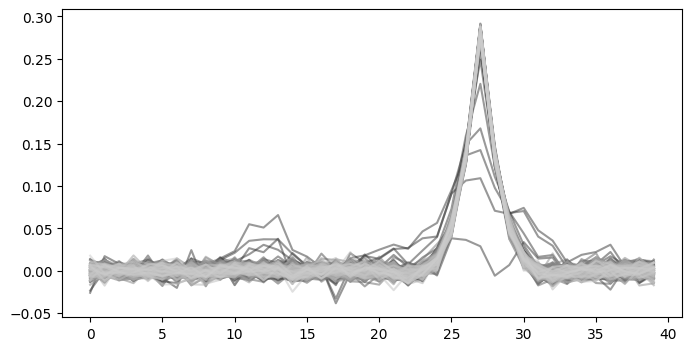

In [6]:
config = dict(
  # data config
  num_dimensions=40,
  xi=(0.1, 3),
  adjust=(-1, 1),
  class_proportion=0.5,
  # model config
  model_cls=models.SimpleNet,
  activation='relu', use_bias=False, batch_size=1000, init_scale=0.01, learning_rate=0.1, evaluation_interval=10,
#   activation='sigmoid', use_bias=True, bias_value=-1, batch_size=1000, init_scale=0.1, learning_rate=0.1, evaluation_interval=10,
  bias_trainable=False,
  num_hiddens=1,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  optimizer_fn=optax.sgd,
  num_epochs=2000,
  # experiment config
  seed=42,#0,
  save_=True,
)

DRT = build_DRT(config['num_dimensions'])
num_epochs = config['num_epochs']
lr = config['learning_rate']

weights_nlgp, metrics_nlgp = simulate(**config, dataset_cls=datasets.AdjustMarginalDataset, marginal_adjust=normal_adjust, gain=100, base_dataset=datasets.NonlinearGPDataset)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))

In [9]:
dataset = datasets.AdjustMarginalDataset(key=jax.random.PRNGKey(0), marginal_adjust=normal_adjust, gain=100, base_dataset=datasets.NonlinearGPDataset, **config)
x, y = dataset[:10000]

##### Adding more hidden units

Using JAX backend: cpu

Using configuration:
{'activation': 'relu',
 'adjust': (-1, 1),
 'base_dataset': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'batch_size': 1000,
 'bias_trainable': False,
 'bias_value': 0.0,
 'class_proportion': 0.5,
 'dataset_cls': <class 'localization.datasets.nonlinear_gp.NonlinearGPDataset'>,
 'df': None,
 'dim': 1,
 'evaluation_interval': 10,
 'gain': 100,
 'init_fn': <function xavier_normal_init at 0x1536b5760>,
 'init_scale': 0.01,
 'kwargs': {},
 'learning_rate': 0.1,
 'marginal_adjust': <function <lambda> at 0x155a1b4c0>,
 'model_cls': <class 'localization.models.feedforward.SimpleNet'>,
 'num_dimensions': 40,
 'num_epochs': 2000,
 'num_hiddens': 1,
 'num_steps': 1000,
 'optimizer_fn': <function sgd at 0x134997420>,
 'sampler_cls': <class 'localization.samplers.base.EpochSampler'>,
 'save_': False,
 'seed': 42,
 'use_bias': False,
 'wandb_': False,
 'xi': (10, 10)}

Length of train dataset: 2000000
Length of eval dataset: 1000
Leng

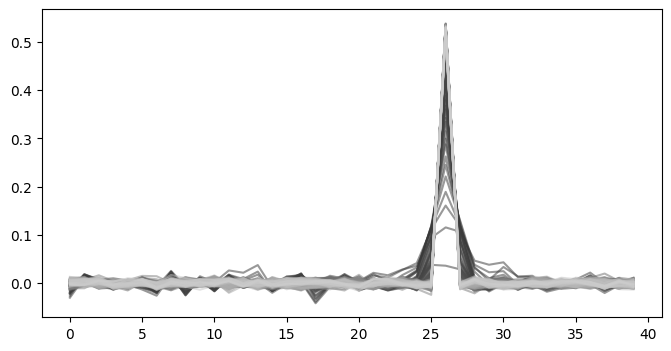

In [2]:
config = dict(
  # data config
  num_dimensions=40,
  xi=(10, 10),
  adjust=(-1, 1),
  class_proportion=0.5,
  # model config
  model_cls=models.SimpleNet,
  activation='relu', use_bias=False, batch_size=1000, init_scale=0.01, learning_rate=0.1, evaluation_interval=10,
  # activation='sigmoid', use_bias=True, bias_value=-1, batch_size=1000, init_scale=0.1, learning_rate=0.1, evaluation_interval=10,
  bias_trainable=False,
  num_hiddens=1,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  optimizer_fn=optax.sgd,
  num_epochs=2000,
  seed=42,#42,
  save_=False,
)

DRT = build_DRT(config['num_dimensions'])
num_epochs = config['num_epochs']
lr = config['learning_rate']

# weights_nlgp, metrics_nlgp = simulate_or_load(**config, dataset_cls=datasets.AdjustMarginalDataset, marginal_adjust=no_adjust, gain=100, base_dataset=datasets.NonlinearGPDataset)
weights_nlgp, metrics_nlgp = simulate(**config, dataset_cls=datasets.NonlinearGPDataset, gain=100)
_ = plot_rf_evolution(weights_nlgp[:,:1], figsize=(8, 4))